In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data=pd.read_excel('Data_Train.xlsx')

In [3]:
train_data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Removing missing values in data

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.dropna(inplace=True)

# Preprocess and performing featurization on data of journey

In [7]:
data =train_data.copy()

In [8]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [9]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
def chang_to_datetime(cols):
    data[cols]= pd.to_datetime(data[cols])
    

In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for cols in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
            chang_to_datetime(cols)

C:\Users\Prashanth_Lokesh\AppData\Local\Temp\ipykernel_16048\3797773679.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data[cols]= pd.to_datetime(data[cols])


In [13]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-05-28 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-28 05:50:00,2023-05-28 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-28 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-05-28 18:05:00,2023-05-28 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-05-28 16:50:00,2023-05-28 21:35:00,4h 45m,1 stop,No info,13302


In [14]:
data['Date_of_Journey'].min(),data['Date_of_Journey'].max()

(Timestamp('2019-01-03 00:00:00'), Timestamp('2019-12-06 00:00:00'))

# lets do Feature Engineering of "Date_of_Journey" & fetch day,month,year !

In [15]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [16]:
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [17]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [18]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-05-28 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-28 05:50:00,2023-05-28 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [19]:
data.drop(columns=['Date_of_Journey'],axis=1,inplace=True)

In [20]:
data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-05-28 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-28 05:50:00,2023-05-28 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-28 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019


# Lets try to clean Dep_Time & Arrival_Time & featurize it..¶

In [21]:
def extract_hour_min(col):
    data[col+'_hour'] = data[col].dt.hour
    data[col+'_min']= data[col].dt.minute

In [22]:
for i in ['Dep_Time','Arrival_Time']:
    extract_hour_min(i)

In [23]:
data.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-05-28 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-05-28 05:50:00,2023-05-28 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-05-28 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


In [24]:
data.drop(columns=['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [25]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25


# lets analyse when will most of the flights will take-off

In [26]:
def flightdeptime(x):
    if (x>0 and x<=4):
        return 'Late Night'
    elif  x>4 and x<=8:
        return 'Early morning'
    elif  x>8 and x<=12:
        return 'Morning'
    elif  x>12 and x<=16:
        return 'Noon'
    elif  x>16 and x<=20:
        return 'Evening'
    else:
        return 'Night'

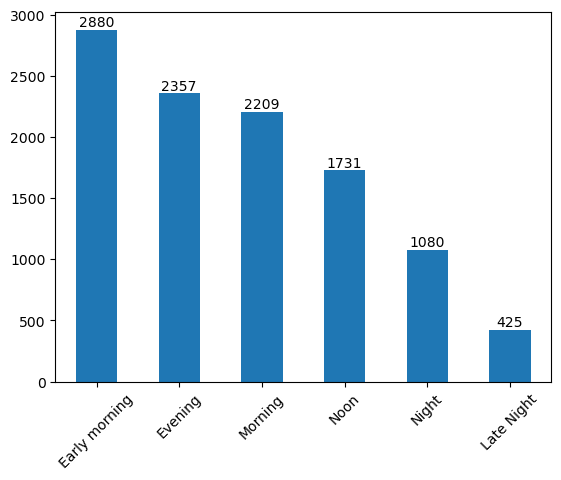

In [27]:
data['Dep_Time_hour'].apply(flightdeptime).value_counts().plot(kind='bar')
bars=plt.bar(data['Dep_Time_hour'].apply(flightdeptime).unique(),data['Dep_Time_hour'].apply(flightdeptime).value_counts(),width=.1)
plt.bar_label(bars)
plt.xticks(rotation=45)
plt.show()

In [28]:
data['Dep_Time_hour'].apply(flightdeptime).unique()

array(['Night', 'Early morning', 'Morning', 'Evening', 'Noon',
       'Late Night'], dtype=object)

In [29]:
!pip install plotly

# lets use Cufflinks & plotly to make your visuals more interactive !


In [30]:
import plotly
!pip install cufflinks
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [31]:
cf.go_offline()

In [32]:
data['Dep_Time_hour'].apply(flightdeptime).value_counts().iplot(kind='bar')

# Pre-process Duration Feature & extract meaningful features

In [33]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [34]:
def preprocess_duration(x):
    if 'h' not in x:
        x= '0h '+x
    elif 'm' not in x:
        x= x+' 0m'
    return x

In [35]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [36]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25


In [37]:
int(data['Duration'][2].split(' ')[0].split('h')[0])

19

In [38]:
int(data['Duration'][0].split(' ')[1].split('m')[0])

50

In [39]:
data['Duration_hour']=data['Duration'].apply(lambda x:int(x.split(' ')[0].split('h')[0]))

In [40]:
data['Duration_minutr']=data['Duration'].apply(lambda x:int(x.split(' ')[1].split('m')[0]))

In [41]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minutr
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


# Lets Analyse whether Duration impacts on Price or not ?


In [42]:
data['Duration_total_mins']= data['Duration'].apply(lambda x: eval(x.replace('h','*60').replace('m','*1').replace(' ','+')))

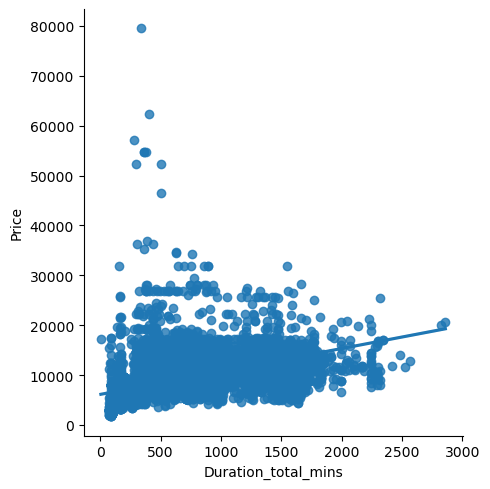

In [43]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

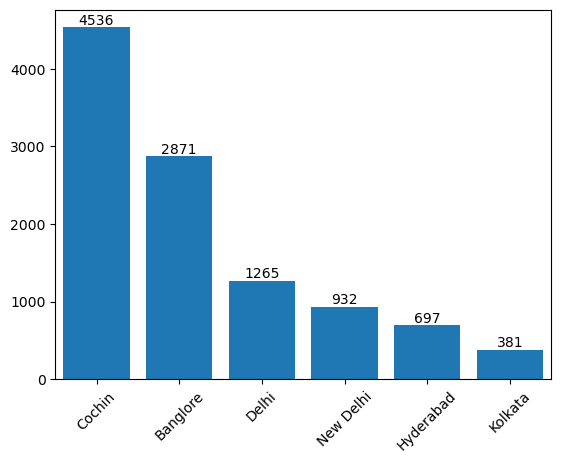

In [44]:
data.Destination.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
bars=plt.bar(data['Destination'].unique(),data['Destination'].value_counts())
plt.bar_label(bars)
plt.show()

In [45]:
data.Destination.value_counts().iplot(kind='bar')


<Axes: ylabel='Destination'>

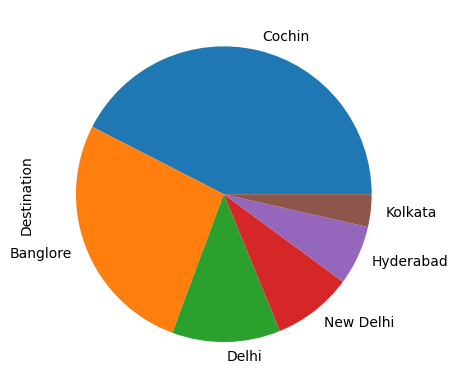

In [46]:
data.Destination.value_counts().plot(kind='pie')


# Lets Perform Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights

In [47]:
data[data['Airline']=='Jet Airways']['Route'].value_counts()

CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: Route, dtype: int64

# Airline vs Price Analysis

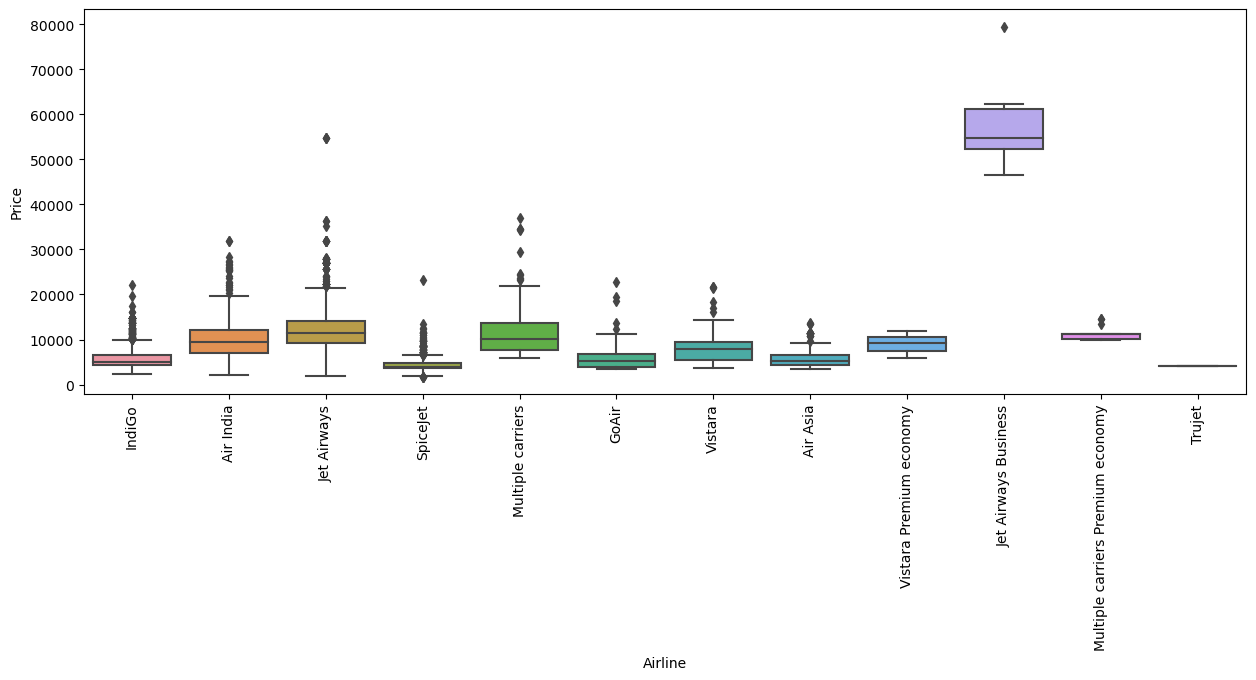

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

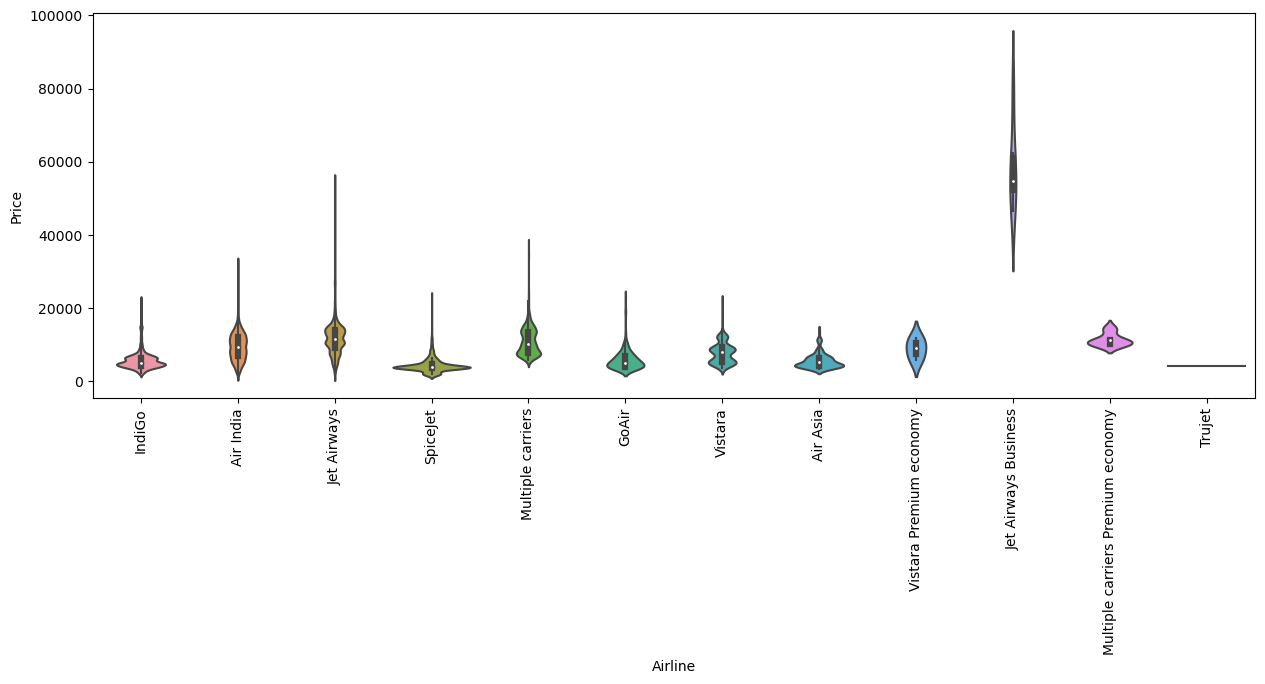

In [49]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Airline',y='Price',data=data)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Duration_hour', 'Duration_minutr',
       'Duration_total_mins'],
      dtype='object')

In [51]:
data.drop(['Route','Additional_Info','Duration_total_mins','Journey_year'],axis=1,inplace=True)

In [52]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hour',
       'Duration_minutr'],
      dtype='object')

# Lets Perform Feature-Encoding on Data !

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Duration           10682 non-null  object
 4   Total_Stops        10682 non-null  object
 5   Price              10682 non-null  int64 
 6   Journey_day        10682 non-null  int64 
 7   Journey_month      10682 non-null  int64 
 8   Dep_Time_hour      10682 non-null  int64 
 9   Dep_Time_min       10682 non-null  int64 
 10  Arrival_Time_hour  10682 non-null  int64 
 11  Arrival_Time_min   10682 non-null  int64 
 12  Duration_hour      10682 non-null  int64 
 13  Duration_minutr    10682 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1.5+ MB


In [54]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [55]:
numeric_col=[col for col in data.columns if data[col].dtype!='object']

In [56]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minutr
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25


In [57]:
category=data['Source'].unique()
category

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [58]:
for i in category:
    data['Source_'+i]= data['Source'].apply(lambda x: 1 if x==i else 0)

In [59]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_hour',
       'Duration_minutr', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [60]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minutr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [61]:
data[data['Source']=='Kolkata'][['Source','Source_Kolkata']]

,Source,Source_Kolkata
1,Kolkata,1
3,Kolkata,1
5,Kolkata,1
11,Kolkata,1
13,Kolkata,1
...,...,...
10662,Kolkata,1
10665,Kolkata,1
10670,Kolkata,1
10678,Kolkata,1


# Performing Target Guided Mean Encoding !

In [62]:
airlines=data.groupby('Airline')['Price'].mean().sort_values().index

In [63]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [64]:
for i,v in enumerate(airlines,0):
    print(i,v)

0 Trujet
1 SpiceJet
2 Air Asia
3 IndiGo
4 GoAir
5 Vistara
6 Vistara Premium economy
7 Air India
8 Multiple carriers
9 Multiple carriers Premium economy
10 Jet Airways
11 Jet Airways Business


In [65]:
dict1 = {key:index for index,key in enumerate(airlines)}

In [66]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [67]:
data['Airline']=data['Airline'].map(dict1)

In [68]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minutr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [69]:
data.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [70]:
data.Destination.replace('New Delhi','Delhi',inplace=True)

In [71]:
dest=data.groupby('Destination')['Price'].mean().sort_values().index

In [72]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [73]:
dict2 = {v:i for i,v in enumerate(dest)}

In [74]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [75]:
data['Destination']=data['Destination'].map(dict2)

In [76]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minutr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


# Perform Manual Encoding on Total_stops feature

In [77]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [78]:
def me(x):
    if x=='non-stop':
        return 0
    elif x=='2 stops':
        return 2
    elif x=='1 stop':
        return 1
    elif x=='3 stops':
        return 3
    return 4

In [79]:
data['Total_Stops']= data['Total_Stops'].apply(lambda x : me(x))

In [80]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [81]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minutr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


# Performing Outlier Detection !

In [82]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

C:\Users\Prashanth_Lokesh\AppData\Local\Temp\ipykernel_16048\2044982778.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Prashanth_Lokesh\AppData\Local\Temp\ipykernel_16048\2044982778.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




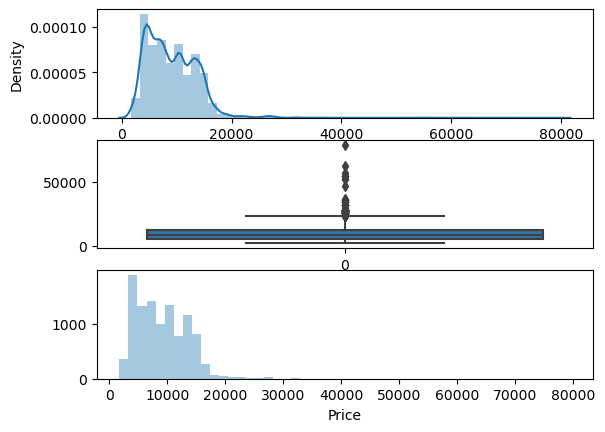

In [83]:
plot(data,'Price')

In [84]:
data['Price']= np.where(data['Price']>35000,data['Price'].median(),data['Price'])

C:\Users\Prashanth_Lokesh\AppData\Local\Temp\ipykernel_16048\2044982778.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Prashanth_Lokesh\AppData\Local\Temp\ipykernel_16048\2044982778.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




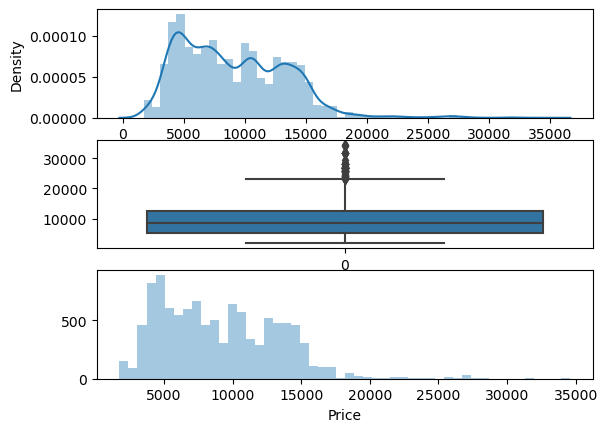

In [85]:
plot(data,'Price')

# Performing Feature Selection !

In [86]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minutr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [87]:
data.drop(columns=['Source','Duration'],inplace=True,axis=1)

In [88]:
data.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
Price                float64
Journey_day            int64
Journey_month          int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Duration_hour          int64
Duration_minutr        int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [89]:
from sklearn.feature_selection import mutual_info_regression

In [90]:
data.head()

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minutr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,6218.0,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,13302.0,3,1,16,50,21,35,4,45,1,0,0,0,0


In [91]:
data.columns

Index(['Airline', 'Destination', 'Total_Stops', 'Price', 'Journey_day',
       'Journey_month', 'Dep_Time_hour', 'Dep_Time_min', 'Arrival_Time_hour',
       'Arrival_Time_min', 'Duration_hour', 'Duration_minutr',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [92]:
y= data['Price']

In [93]:
x = data.drop(columns='Price',axis=1)

In [94]:
mutual_info_regression(x,y)
imp= pd.DataFrame(mutual_info_regression(x,y),index=x.columns,columns=['Importance'])

In [95]:
imp.sort_values('Importance',ascending=False)

,Importance
Destination,0.993819
Airline,0.978082
Total_Stops,0.789657
Source_Delhi,0.519660
Duration_hour,0.471282
Source_Kolkata,0.454635
Arrival_Time_hour,0.411363
Source_Banglore,0.396388
Arrival_Time_min,0.346737
Duration_minutr,0.346531


In [96]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hour,Duration_minutr,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882.0,6,9,9,25,4,25,19,0,0,0,1,0,0


# Lets build ML Model , then later on we can think of saving it..

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
ml_model = RandomForestRegressor()

In [101]:
model=ml_model.fit(x_train,y_train)

In [102]:
y_pred=model.predict(x_test)

In [103]:
y_pred

array([16780.99,  6340.11,  8843.06, ...,  3532.86,  6271.89,  6766.72])

In [104]:
y_pred.shape,len(x_test)

((2671,), 2671)

In [105]:
import pickle

In [111]:
file=open('rf_random.pkl','wb')

In [112]:
pickle.dump(model,file)

TypeError: cannot pickle '_io.BufferedReader' object

In [108]:
model=open('rf_random.pkl','rb')

In [109]:
forest=pickle.load(model)

EOFError: Ran out of input